In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
import seaborn as sns                       #visualisation
sns.set(color_codes=True)
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv("Wind_turbine.csv")
 

In [3]:
# To display the top 5 rows 
df.head(5)  

date  Wind_speed  Power  Nacelle_ambient_temperature  \
0  24-09-2021        1.75  11.70                        62.91   
1  30-01-2021        9.06   2.27                        40.00   
2  20-01-2021       26.84   3.01                         1.94   
3  22-08-2021       12.53   3.45                        40.00   
4  22-02-2021       17.57   2.84                        40.00   

   Generator_bearing_temperature  Gear_oil_temperature  Ambient_temperature  \
0                         124.29                124.31                66.33   
1                          92.42                 81.47                30.66   
2                          75.34                 79.66               -13.09   
3                          87.29                 78.79                10.46   
4                          85.59                 77.65                 9.99   

   Rotor_Speed  Bearing_temperature)  Generator_speed  Yaw_angle  \
0       407.43                143.18          2379.39     169.01   
1       181.12                 62.00          1595.49      60.00   
2       150.95                 62.00          1471.21      30.18   
3       260.71                 62.00          1402.28      22.01   
4       157.00                 62.00          1455.06      38.35   

   Wind_direction  Gear_box_inlet_temperature Failure_status  
0           98.90                       73.52        Failure  
1           11.06                       15.90     No_failure  
2           20.00                       15.03     No_failure  
3           66.96                       10.00     No_failure  
4            4.60                       13.12     No_failure

In [4]:
df.tail(5)                        # To display the botton 5 rows

date  Wind_speed  Power  Nacelle_ambient_temperature  \
2895  10-06-2021        5.27   3.44                        37.23   
2896  07-04-2021       39.74   0.96                       -32.62   
2897  04-05-2021       14.15   2.32                        12.19   
2898  18-09-2021        1.69   5.39                       -24.84   
2899  23-12-2021       36.68   2.53                        39.62   

      Generator_bearing_temperature  Gear_oil_temperature  \
2895                          82.10                 50.00   
2896                          48.97                104.24   
2897                          77.40                 73.56   
2898                         120.92                123.73   
2899                          83.70                 50.00   

      Ambient_temperature  Rotor_Speed  Bearing_temperature)  Generator_speed  \
2895                 7.50       143.91                 62.00          1543.39   
2896               -12.97        11.11                 58.31           734.20   
2897                40.00       122.11                 62.00          1374.01   
2898                83.80       422.76                112.07          2153.45   
2899                -9.86       178.25                 62.00          1302.78   

      Yaw_angle  Wind_direction  Gear_box_inlet_temperature Failure_status  
2895      34.73           91.77                       10.23     No_failure  
2896     106.27          351.45                       27.40        Failure  
2897      60.00           16.88                       14.93     No_failure  
2898     175.78           -9.53                      109.59        Failure  
2899      14.12           45.82                       16.54     No_failure

In [5]:
df.dtypes  #Checking the data types

date                              object
Wind_speed                       float64
Power                            float64
Nacelle_ambient_temperature      float64
Generator_bearing_temperature    float64
Gear_oil_temperature             float64
Ambient_temperature              float64
Rotor_Speed                      float64
Bearing_temperature)             float64
Generator_speed                  float64
Yaw_angle                        float64
Wind_direction                   float64
Gear_box_inlet_temperature       float64
Failure_status                    object
dtype: object

In [6]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           2900 non-null   object 
 1   Wind_speed                     2880 non-null   float64
 2   Power                          2875 non-null   float64
 3   Nacelle_ambient_temperature    2894 non-null   float64
 4   Generator_bearing_temperature  2900 non-null   float64
 5   Gear_oil_temperature           2900 non-null   float64
 6   Ambient_temperature            2900 non-null   float64
 7   Rotor_Speed                    2900 non-null   float64
 8   Bearing_temperature)           2900 non-null   float64
 9   Generator_speed                2882 non-null   float64
 10  Yaw_angle                      2874 non-null   float64
 11  Wind_direction                 2900 non-null   float64
 12  Gear_box_inlet_temperature     2897 non-null   f

In [7]:
le = LabelEncoder()
df['Failure_status'] = le.fit_transform(df['Failure_status'])

In [8]:
#Describe the data

df.describe()

Wind_speed        Power  Nacelle_ambient_temperature  \
count  2880.000000  2875.000000                  2894.000000   
mean     17.556566     3.124821                    21.007015   
std      11.263061     1.969012                    34.391479   
min      -4.200000     0.000000                  -182.940000   
25%       9.770000     2.400000                     6.710000   
50%      16.625000     2.790000                    23.115000   
75%      23.240000     3.160000                    40.000000   
max      76.030000    11.990000                   297.430000   

       Generator_bearing_temperature  Gear_oil_temperature  \
count                    2900.000000           2900.000000   
mean                       83.924600             77.742121   
std                        21.892164             20.166692   
min                        10.080000             50.000000   
25%                        74.960000             62.890000   
50%                        83.365000             74.010000   
75%                        93.125000             84.955000   
max                       144.880000            129.840000   

       Ambient_temperature  Rotor_Speed  Bearing_temperature)  \
count          2900.000000  2900.000000           2900.000000   
mean             14.099759   182.725883             78.859034   
std              23.997479   100.386658             27.282715   
min             -20.000000     0.130000             10.100000   
25%              -2.912500   116.482500             62.000000   
50%              10.210000   179.820000             62.000000   
75%              25.167500   234.630000            105.000000   
max              84.910000   449.540000            149.730000   

       Generator_speed    Yaw_angle  Wind_direction  \
count      2882.000000  2874.000000     2900.000000   
mean       1421.933255    45.626545       55.220066   
std         432.191286    42.838404       87.834327   
min         302.250000     0.070000     -499.700000   
25%        1212.005000    12.842500       12.832500   
50%        1406.115000    32.845000       34.725000   
75%        1610.885000    60.000000       78.032500   
max        3793.380000   179.910000      666.540000   

       Gear_box_inlet_temperature  Failure_status  
count                 2897.000000     2900.000000  
mean                    22.964850        0.827586  
std                     23.167003        0.377805  
min                     10.000000        0.000000  
25%                     13.570000        1.000000  
50%                     15.870000        1.000000  
75%                     19.010000        1.000000  
max                    119.890000        1.000000

In [9]:
df.shape

(2900, 14)

In [10]:
df.isnull().sum() #Checking null values

date                              0
Wind_speed                       20
Power                            25
Nacelle_ambient_temperature       6
Generator_bearing_temperature     0
Gear_oil_temperature              0
Ambient_temperature               0
Rotor_Speed                       0
Bearing_temperature)              0
Generator_speed                  18
Yaw_angle                        26
Wind_direction                    0
Gear_box_inlet_temperature        3
Failure_status                    0
dtype: int64

In [11]:
#Mean imputation 
imputer = SimpleImputer(strategy="mean")

numeric_columns = df.select_dtypes(include="number").columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


In [12]:
#Mode imputation
imputer = SimpleImputer(strategy="most_frequent")

categorical_columns = df.select_dtypes(include="object").columns
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])


In [13]:
#Check changes
df.isnull().sum()

date                             0
Wind_speed                       0
Power                            0
Nacelle_ambient_temperature      0
Generator_bearing_temperature    0
Gear_oil_temperature             0
Ambient_temperature              0
Rotor_Speed                      0
Bearing_temperature)             0
Generator_speed                  0
Yaw_angle                        0
Wind_direction                   0
Gear_box_inlet_temperature       0
Failure_status                   0
dtype: int64

In [14]:
#Find the duplicates

df.duplicated().sum()

np.int64(0)

In [15]:
df.count()      # Used to count the number of rows

date                             2900
Wind_speed                       2900
Power                            2900
Nacelle_ambient_temperature      2900
Generator_bearing_temperature    2900
Gear_oil_temperature             2900
Ambient_temperature              2900
Rotor_Speed                      2900
Bearing_temperature)             2900
Generator_speed                  2900
Yaw_angle                        2900
Wind_direction                   2900
Gear_box_inlet_temperature       2900
Failure_status                   2900
dtype: int64

In [16]:
#Handling outliers

# Iterate through each column
for column in df.columns:
    # Check if the column contains numeric values
    if df[column].dtype in ['int64', 'float64']:
        # Winsorize the column at the 1st and 99th percentiles
        df[column] = winsorize(df[column], limits=[0.01, 0.01])

In [17]:
df.shape

(2900, 14)

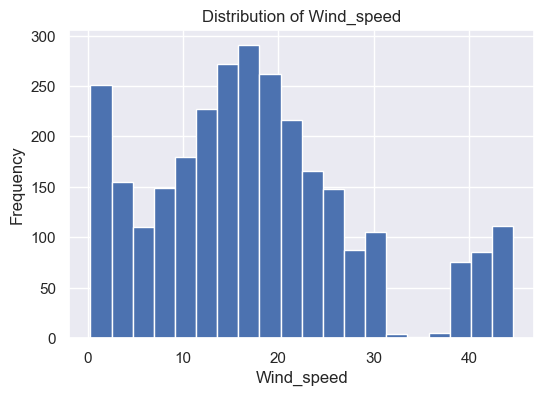

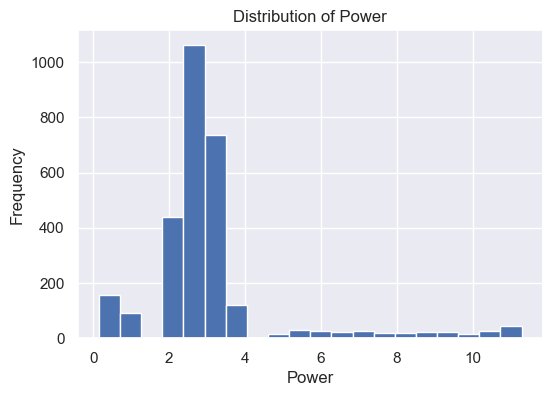

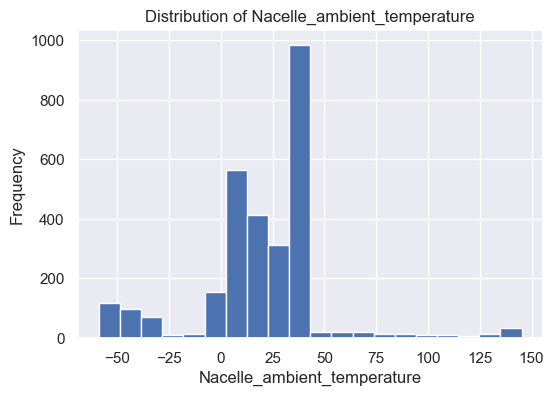

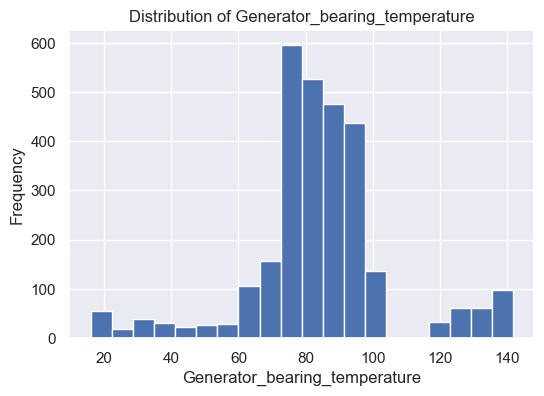

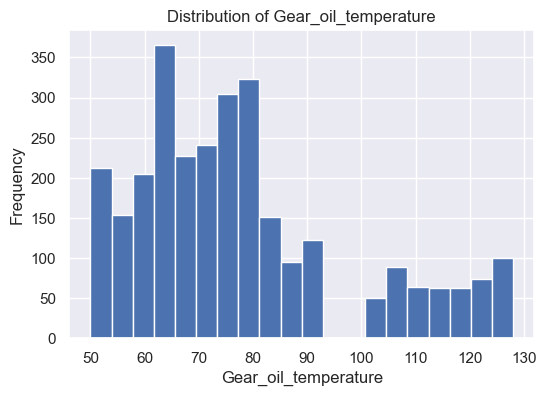

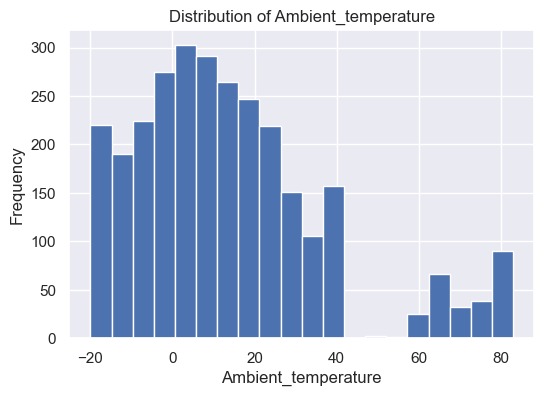

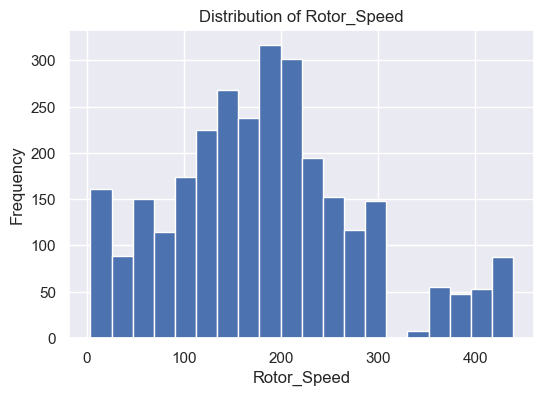

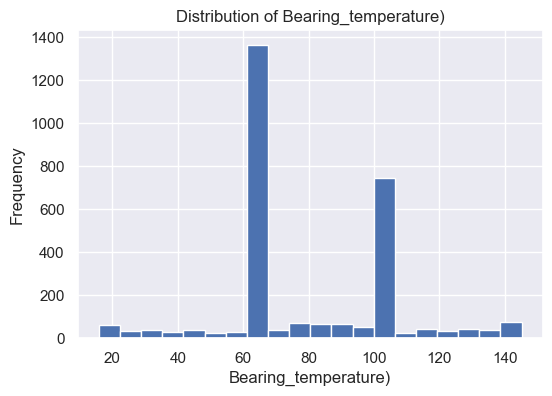

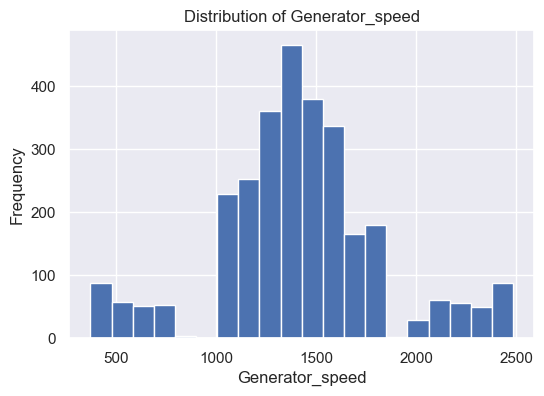

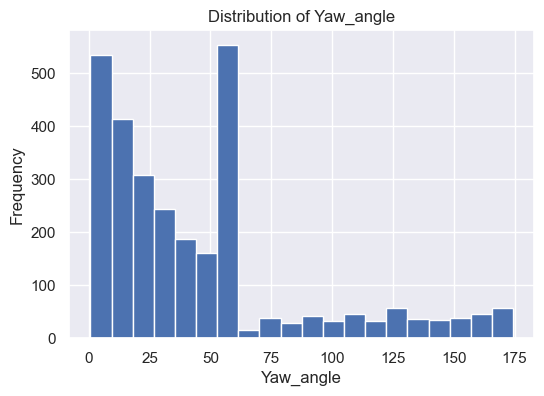

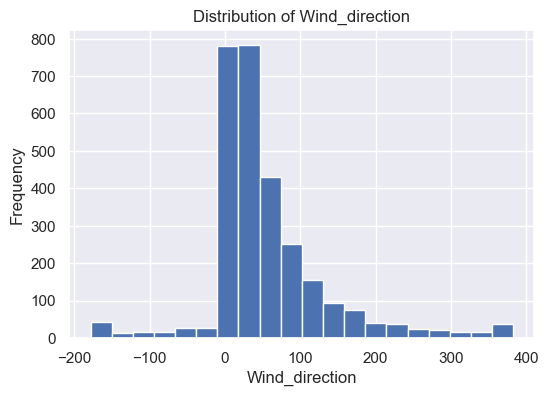

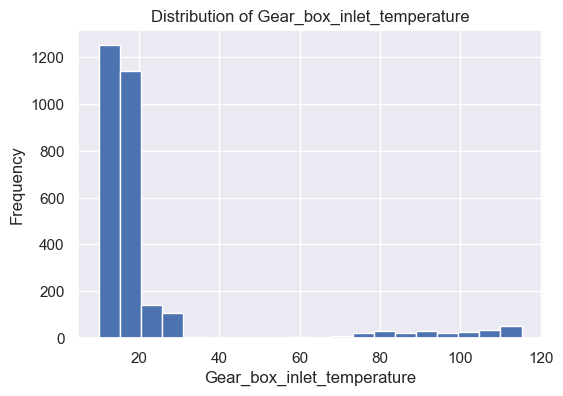

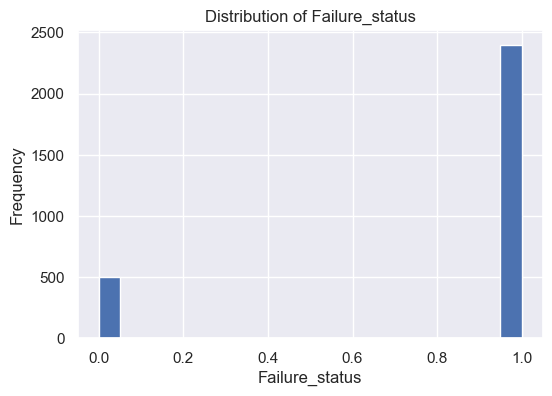

In [18]:
#Plot histogram
for column in df.columns:
    if(df[column].dtypes=='float64'):
        plt.figure(figsize=(6, 4))
        plt.hist(df[column], bins=20)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()

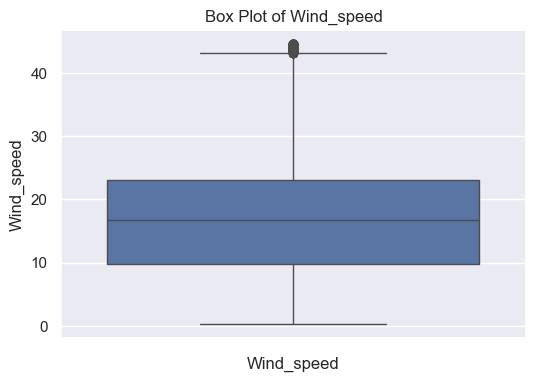

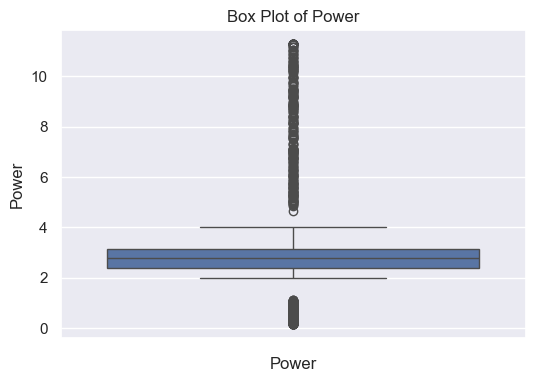

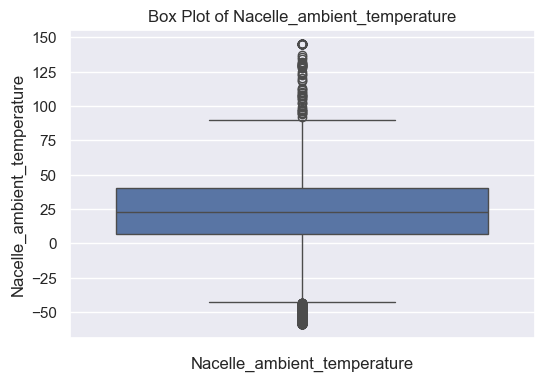

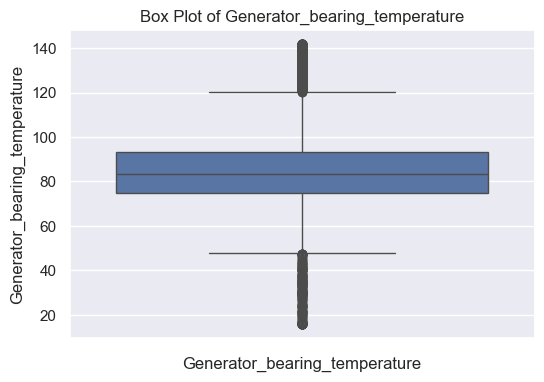

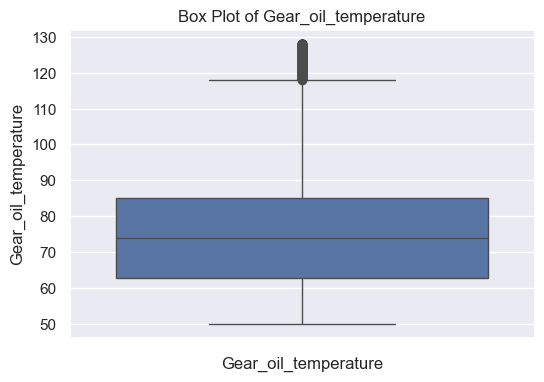

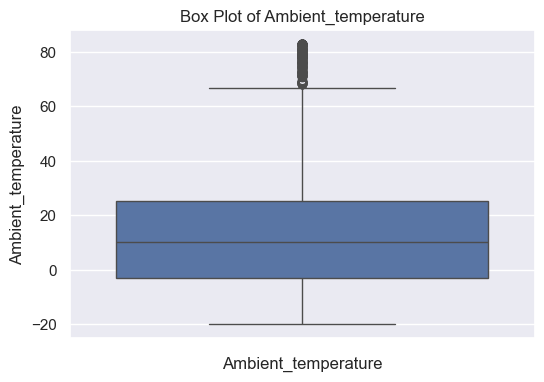

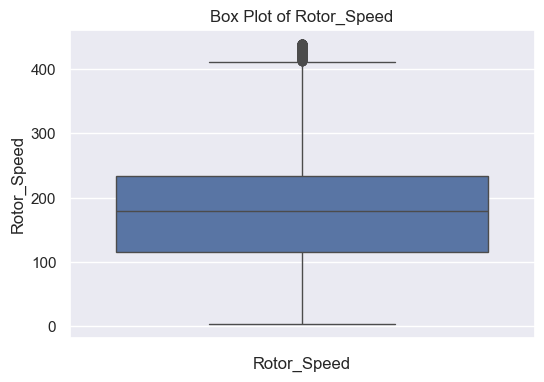

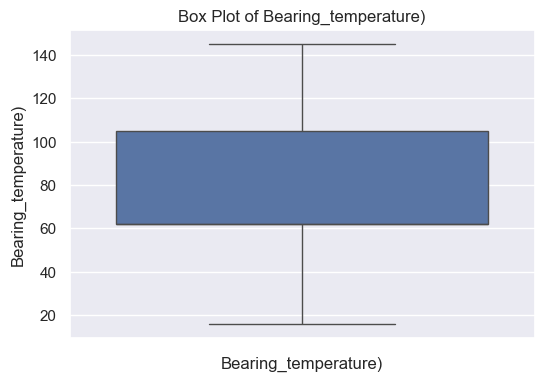

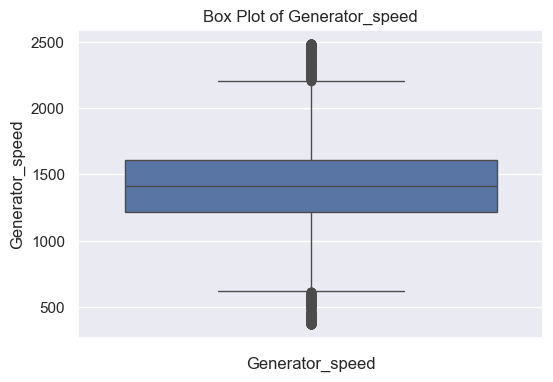

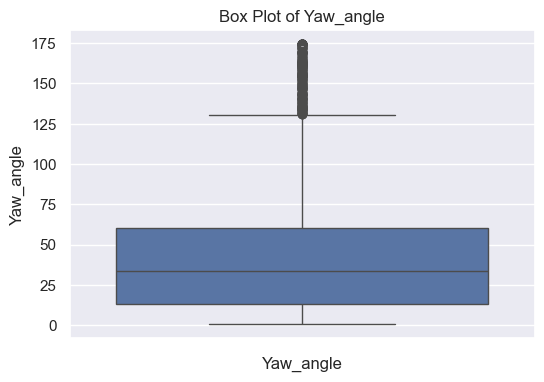

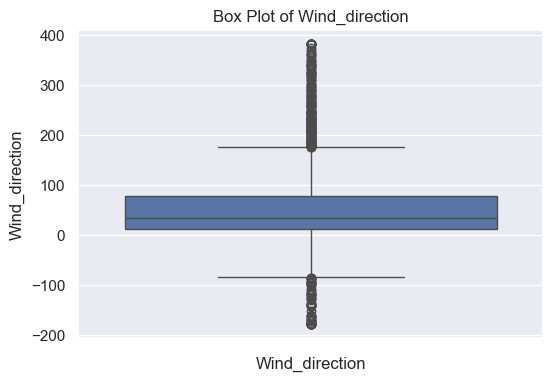

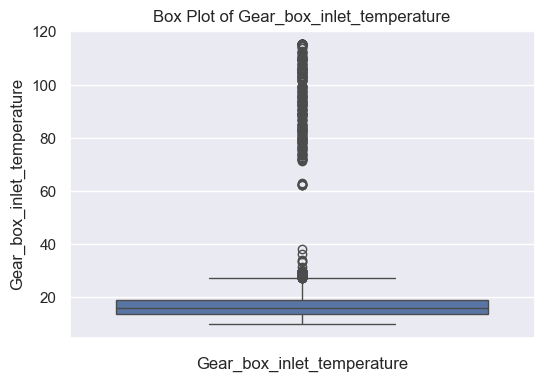

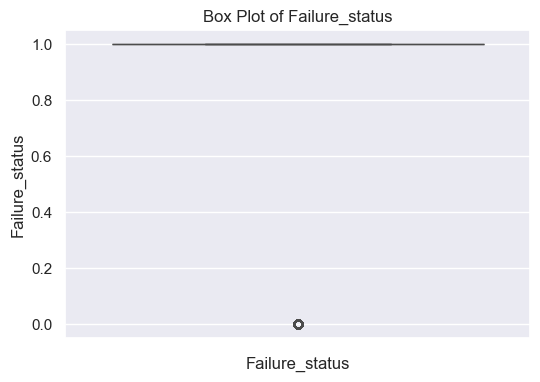

In [19]:
#Plot boxplot
for column in df.columns:
    if(df[column].dtypes=='float64'):
        plt.figure(figsize=(6, 4))
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.title(f'Box Plot of {column}')
        plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


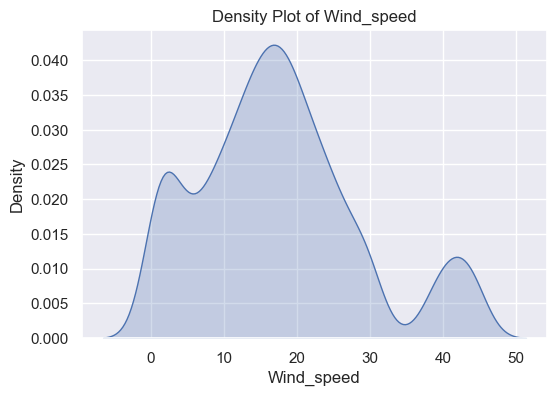

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


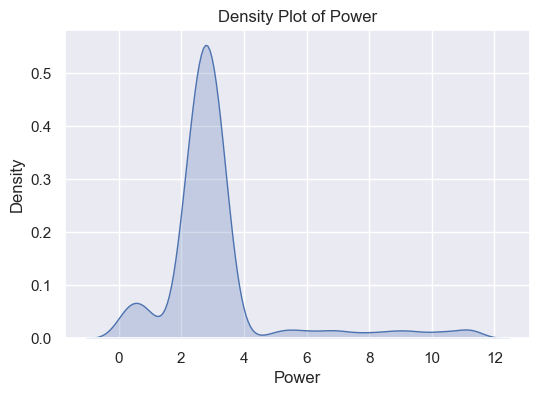

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


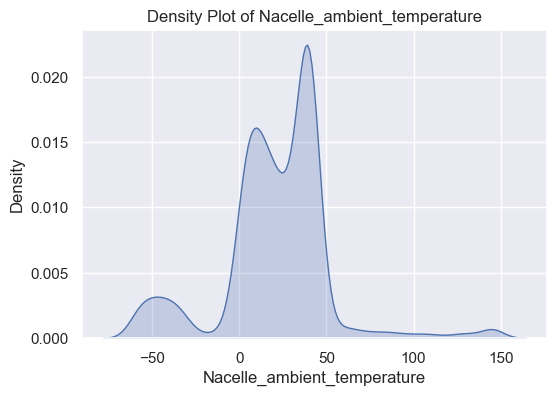

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


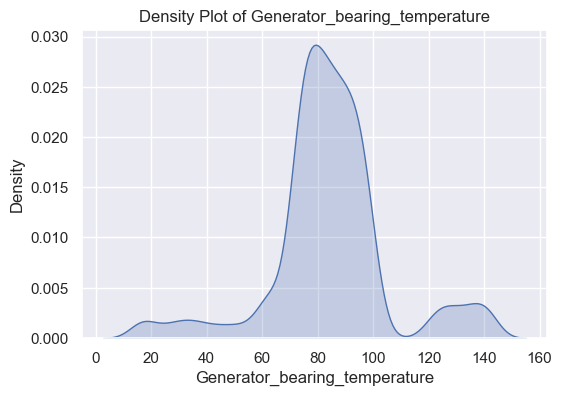

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


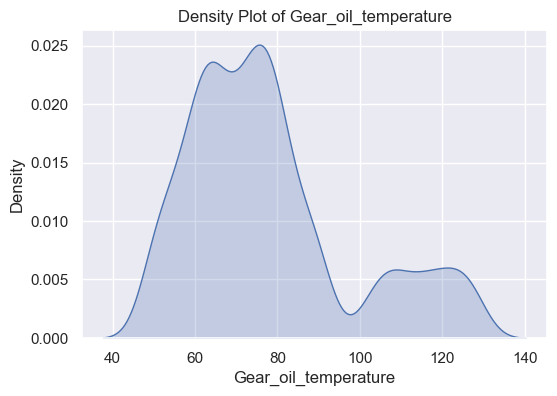

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


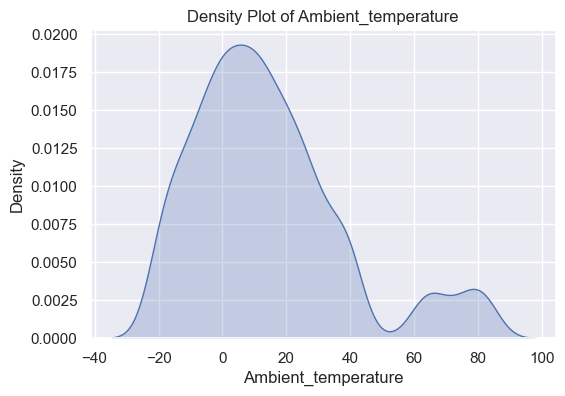

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


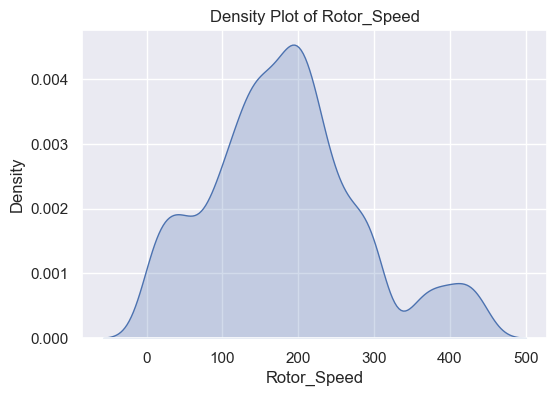

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


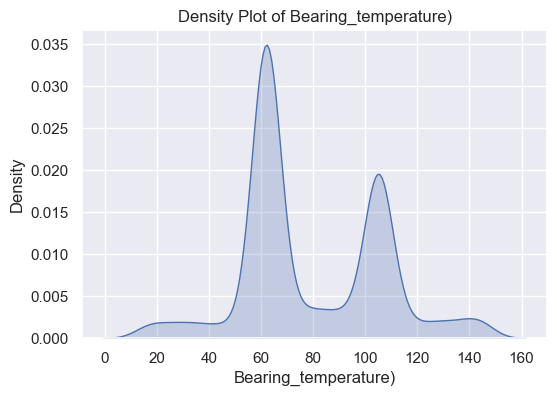

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


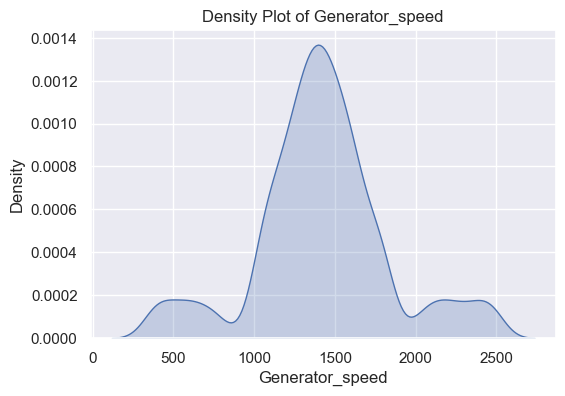

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


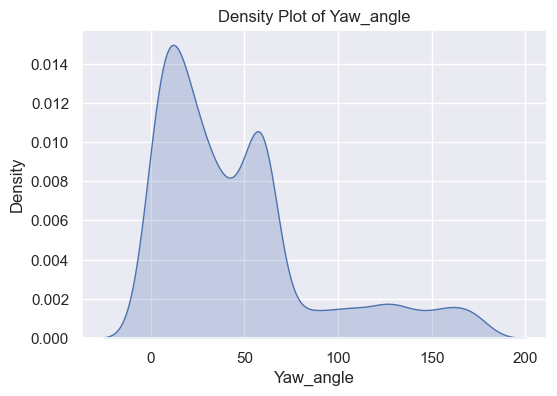

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


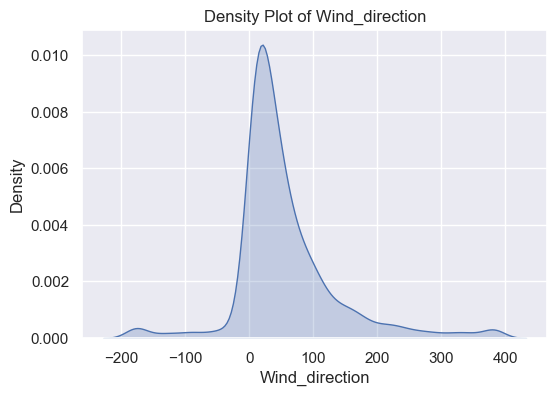

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


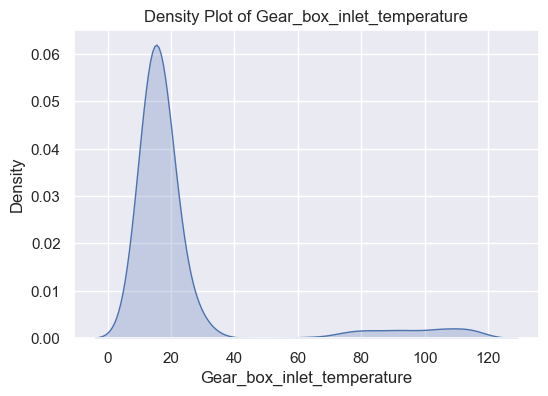

C:\Users\harsh\AppData\Local\Temp\ipykernel_23140\2522697348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), shade=True)


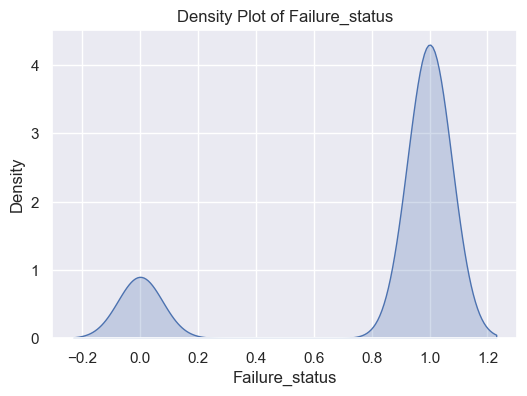

In [20]:
# Plot density plots
for column in df.columns:
    if df[column].dtypes == 'float64':
        plt.figure(figsize=(6, 4))
        sns.kdeplot(df[column].dropna(), shade=True)
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.title(f'Density Plot of {column}')
        plt.show()

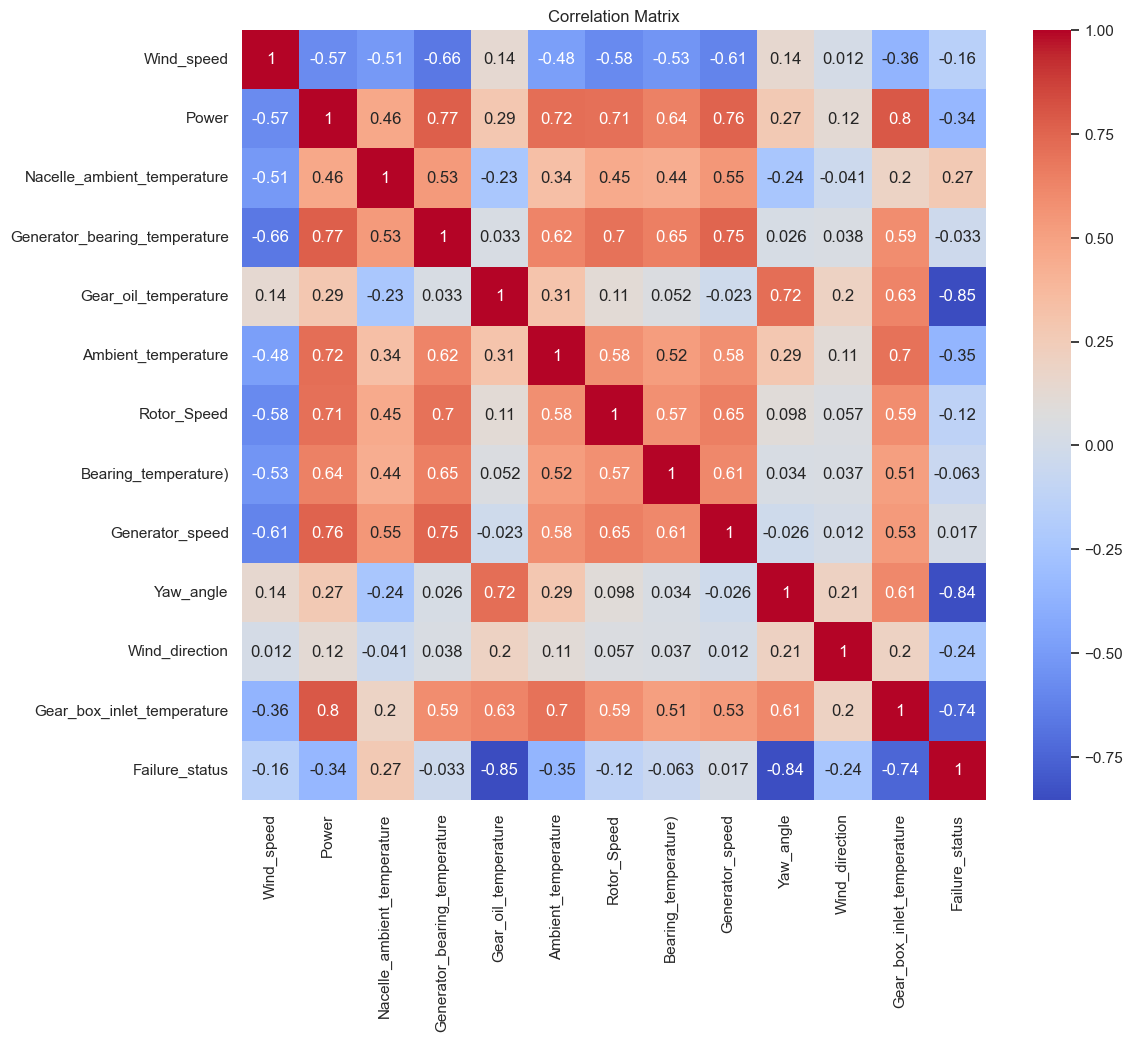

In [21]:
# Drop columns with non-numeric values
numeric_columns = df.select_dtypes(include='float64').columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

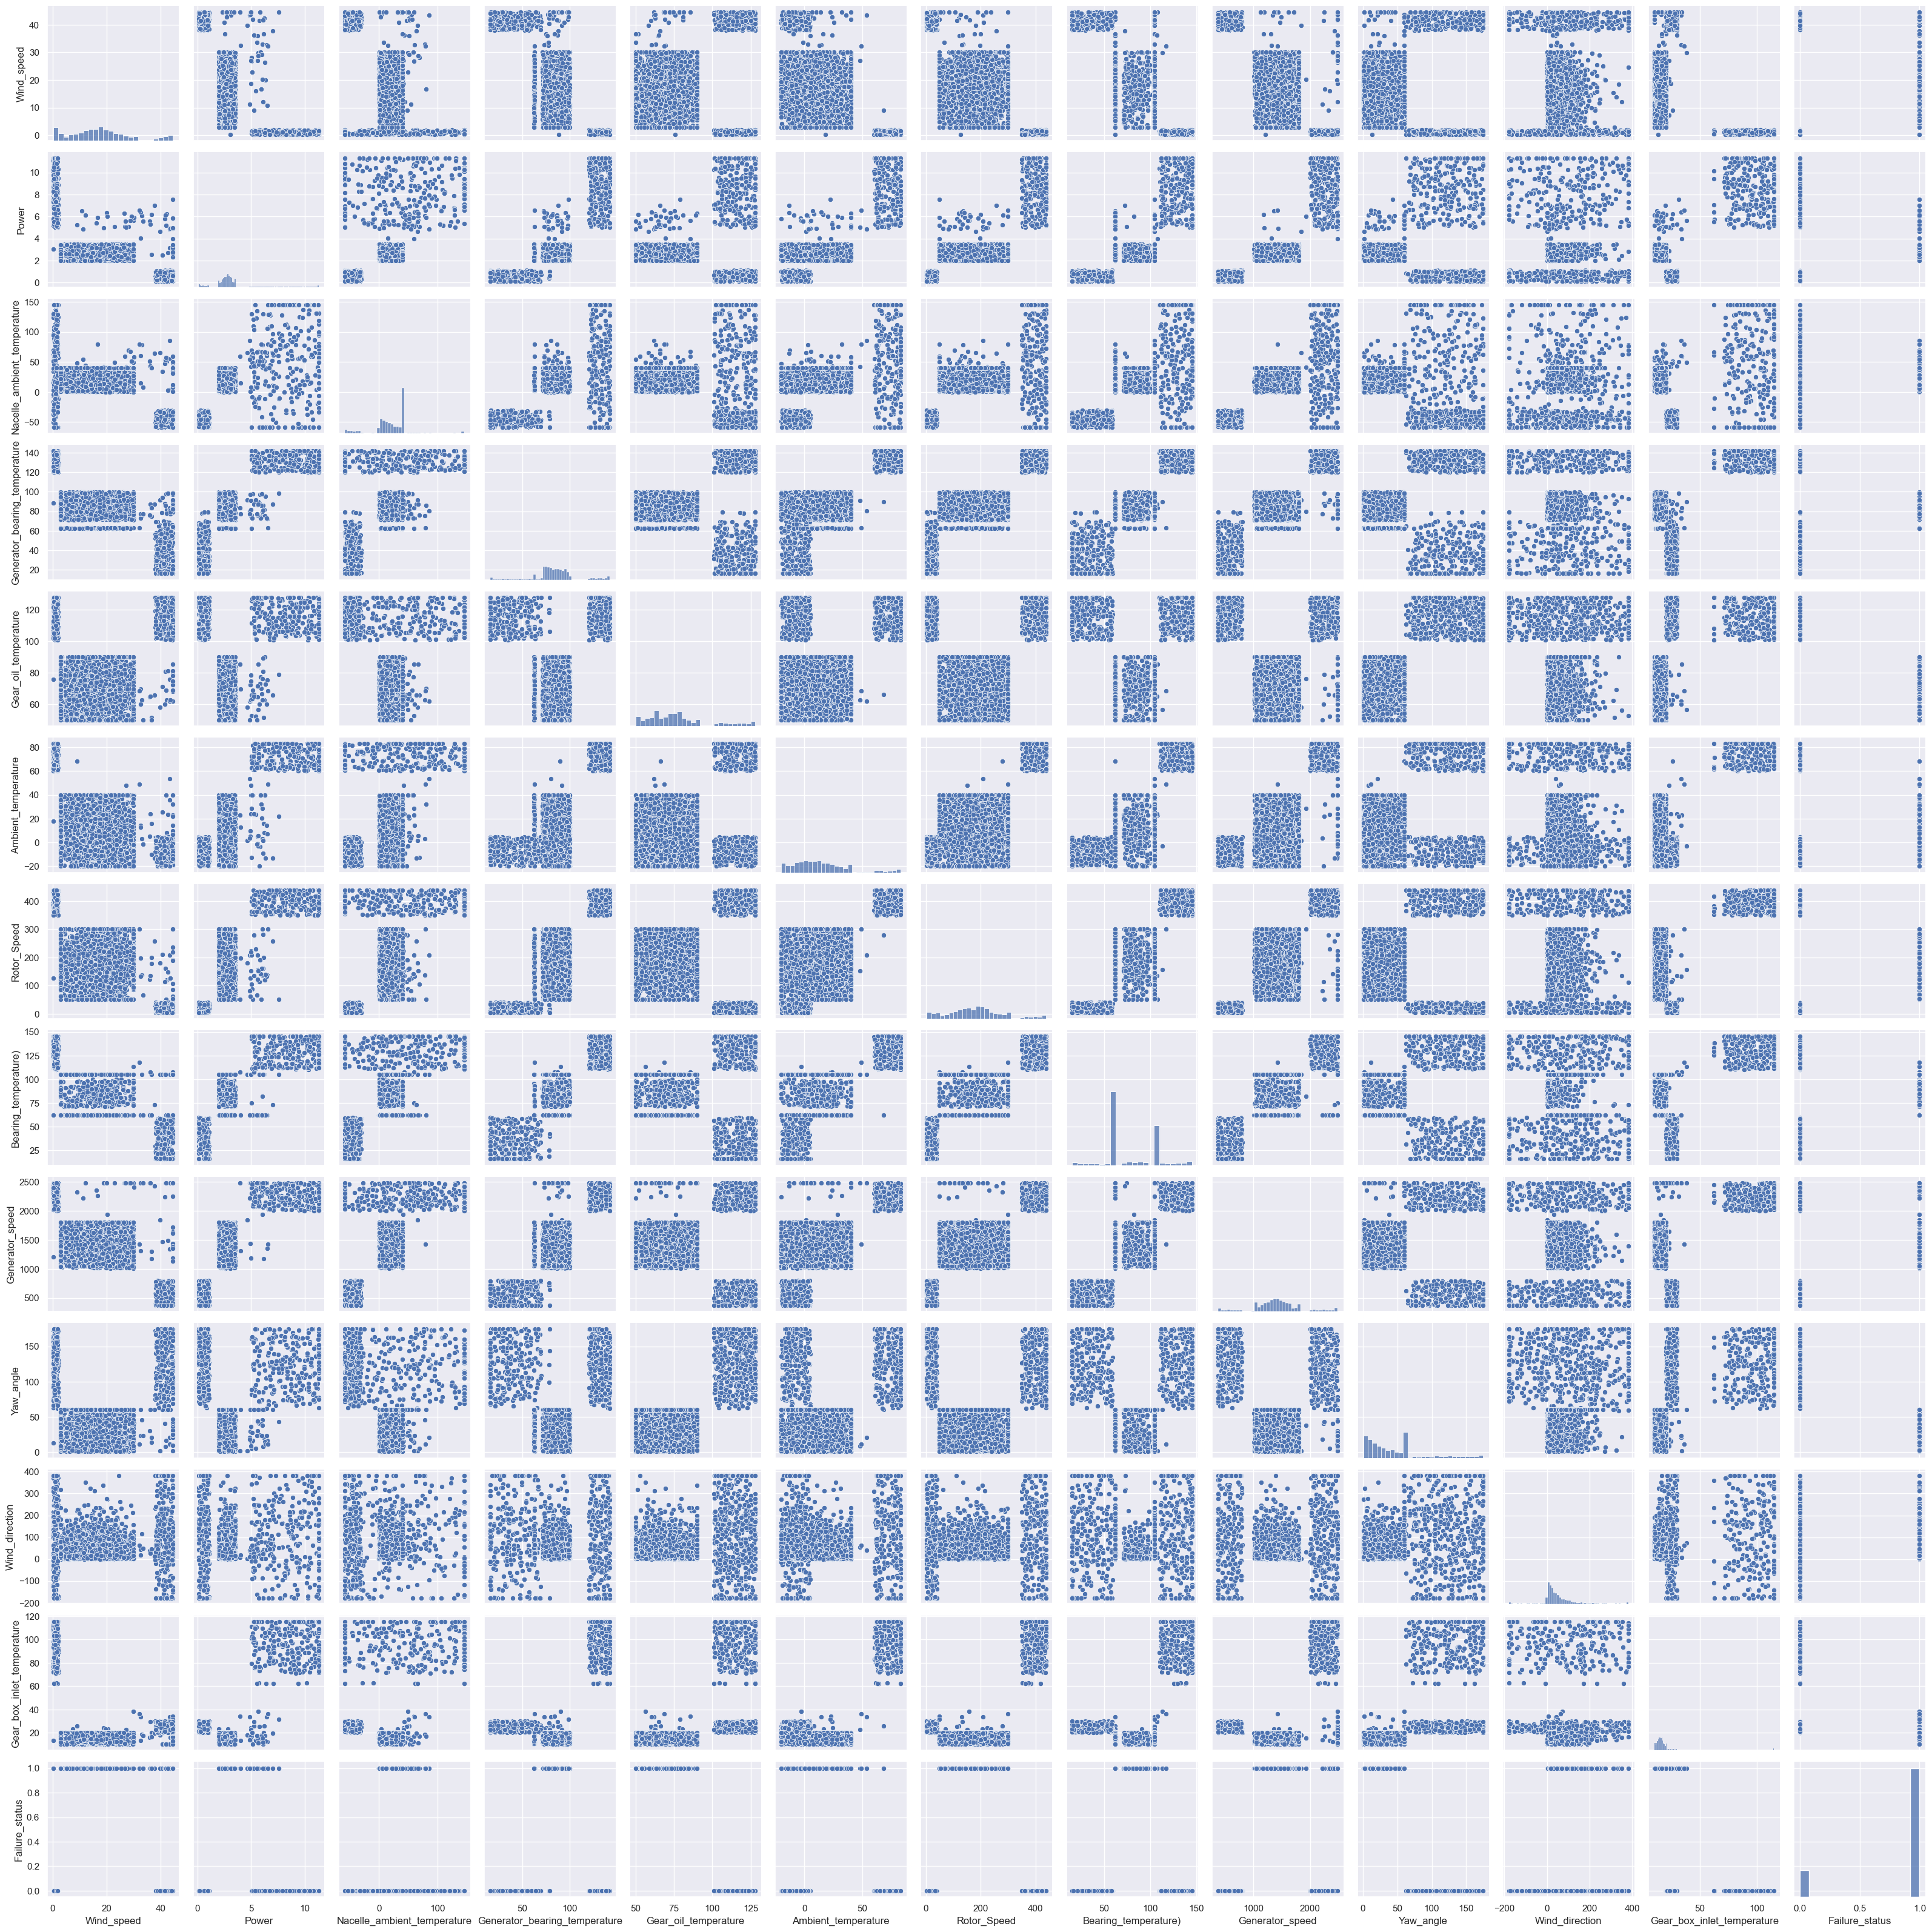

In [22]:
# Plot scatter plots for all column pairs
sns.pairplot(df)
plt.show()

In [25]:
# Save the cleaned data to a new file
df.to_csv("cleaned_data.csv", index=False)